# Problem Statement

### XYZ co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels and regions; uncover seasonal trends and outliers and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.



In [5]:
# Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sheets = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name = None)


In [7]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_region = sheets['Regions']
df_state_regions = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [8]:
 df_sales, df_customers, df_products,df_region, df_state_regions, df_budgets

(        OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         AXW291           

In [9]:
# print("df_sales shape: ",df_sales.shape)
# print("df_customers shape: ",df_customers.shape)
# print("df_products shape: ",df_products.shape)
# print("df_region shape: ",df_region.shape)
# print("df_state_regions shape: ",df_state_regions.shape)
# print("df_budgets shape: ",df_budgets.shape)

dfs = {
    "df_sales": df_sales,
    "df_customers": df_customers,
    "df_products": df_products,
    "df_region": df_region,
    "df_state_regions": df_state_regions,
    "df_budgets": df_budgets
}

for name, df in dfs.items():
    print(f"{name} shape: {df.shape}")


df_sales shape: (64104, 12)
df_customers shape: (175, 2)
df_products shape: (30, 2)
df_region shape: (994, 15)
df_state_regions shape: (49, 3)
df_budgets shape: (30, 2)


In [10]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [11]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [12]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [13]:
df_region.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [14]:
df_state_regions.head()

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [15]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [16]:
new_header = df_state_regions.iloc[0]
df_state_regions.columns = new_header
df_state_regions = df_state_regions[1:].reset_index(drop=True)

df_state_regions.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [17]:
for name, df in dfs.items():
    print(f"{name }: \n")
    print(df.isnull().sum())
    print("\n\n")

df_sales: 

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64



df_customers: 

Customer Index    0
Customer Names    0
dtype: int64



df_products: 

Index           0
Product Name    0
dtype: int64



df_region: 

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64



df_state_regions: 

0
State Code    0
State         0
Region        0
dtype: int64



df_budgets: 

Product Name    0
2017 Budgets    0
dtype: int6

# Data Cleaning and Wrangling

In [18]:
# Merge sales and customer

df_sales = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
    
)

In [19]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [20]:
#Merge sales and products

df_sales = df_sales.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
    
)

In [21]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [22]:
# Merge with regions

df_sales = df_sales.merge(
    df_region,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
    
)


In [23]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [24]:
df_sales.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [25]:
# Merge with State Regions



df_sales = df_sales.merge(
    df_state_regions[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
    
)


In [26]:
df_sales.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region'],
      dtype='object')

In [27]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [28]:
# merge with budgets

df_sales = df_sales.merge(
    df_budgets,
    how='left',
    on='Product Name',
    
    
)

In [29]:
df_sales.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'State Code', 'Region', '2017 Budgets'],
      dtype='object')

In [30]:
# Clean up redundant columns

cols_to_drop = ['Customer Index','Index','id','State Code']
df_sales = df_sales.drop(columns=cols_to_drop,errors='ignore')

df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [31]:
# convert the column names to lower case for convinience

df_sales.columns = df_sales.columns.str.lower()

df_sales.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [32]:
# Getting rid of columns which are not needed (on domain kowledge) and keep needed ones

cols_to_keep = ['ordernumber',
                'orderdate',
                'customer names',
                'channel',
                'product name',
                'order quantity',
                'unit price',
                'line total',
                'total unit cost',
                'state_code',
                'county',
                'state',
                'region',
                'latitude',
                'longitude',
                '2017 budgets'
               ]

In [33]:
df_sales = df_sales[cols_to_keep]


In [34]:
df_sales

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,5685138.270
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,959899.218
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,3720639.645
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,2067108.120


In [35]:
df_sales.shape

(64104, 16)

In [36]:
df_sales.columns

Index(['ordernumber', 'orderdate', 'customer names', 'channel', 'product name',
       'order quantity', 'unit price', 'line total', 'total unit cost',
       'state_code', 'county', 'state', 'region', 'latitude', 'longitude',
       '2017 budgets'],
      dtype='object')

In [37]:
# Rename the columns 
df_sales = df_sales.rename(columns={
            'ordernumber'      : 'order_number',   
            'orderdate'        : 'order_date',    
            'customer names'   : 'customer_name', 
            'product name'     : 'product_name', 
            'order quantity'   : 'quantity',   
            'unit price'       : 'unit_price',     
            'line total'       : 'revenue',         
            'total unit cost'  : 'total_unit_cost',           
            'state_code'       : 'state',          
            'state'            : 'state_name',     
            'region'           : 'us_region',      
            'latitude'         : 'lat',            
            'longitude'        : 'lon',           
            '2017 budgets'     : 'budget' 
})

In [38]:
df_sales.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'quantity', 'unit_price', 'revenue', 'total_unit_cost',
       'state', 'county', 'state_name', 'us_region', 'lat', 'lon', 'budget'],
      dtype='object')

In [39]:
# Blank out budgets for non-2017 orders

df_sales.loc[df_sales['order_date'].dt.year != 2017,'budget'] = pd.NA

# line total is revenue (defination)

df_sales[['order_date','product_name','revenue','budget']].head()

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [40]:
## Filter the dataset to include only records from year 2017

df_2017 = df_sales[df_sales['order_date'].dt.year == 2017]

In [41]:
df_2017.shape

(15263, 16)

# Feature Engineering

In [42]:
df_sales['total_cost'] = df_sales['quantity'] * df_sales['total_unit_cost']

In [43]:
df_sales['profit'] = df_sales['revenue'] - df_sales['total_cost']
df_sales['profit_margin_pct'] = df_sales['profit'] / df_sales['revenue'] * 100

In [44]:
df_sales.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,total_unit_cost,state,county,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


# EDA

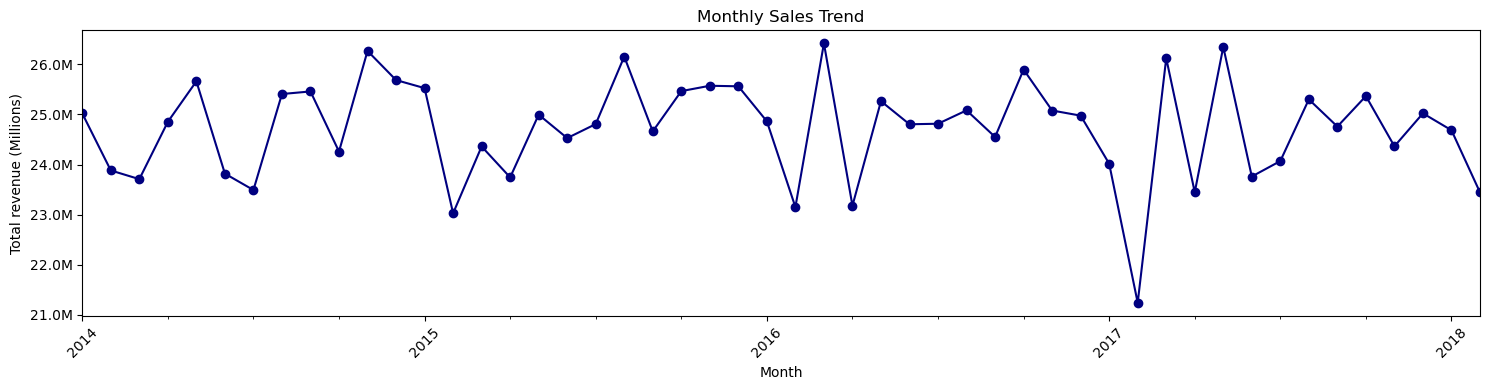

In [45]:
df_sales['order_month'] = df_sales['order_date'].dt.to_period('M')

monthly_sales = df_sales.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o',color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total revenue (Millions)')
plt.xticks(rotation =45)

plt.tight_layout()
plt.show()

In [46]:
df_sales.columns


Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'quantity', 'unit_price', 'revenue', 'total_unit_cost',
       'state', 'county', 'state_name', 'us_region', 'lat', 'lon', 'budget',
       'total_cost', 'profit', 'profit_margin_pct', 'order_month'],
      dtype='object')

In [47]:
# ensure order_date is datetime
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])

# remove records from Jan 2018 and Feb 2018
df_sales = df_sales[
    ~(
        (df_sales['order_date'].dt.year == 2018) &
        (df_sales['order_date'].dt.month.isin([1, 2]))
     )
]


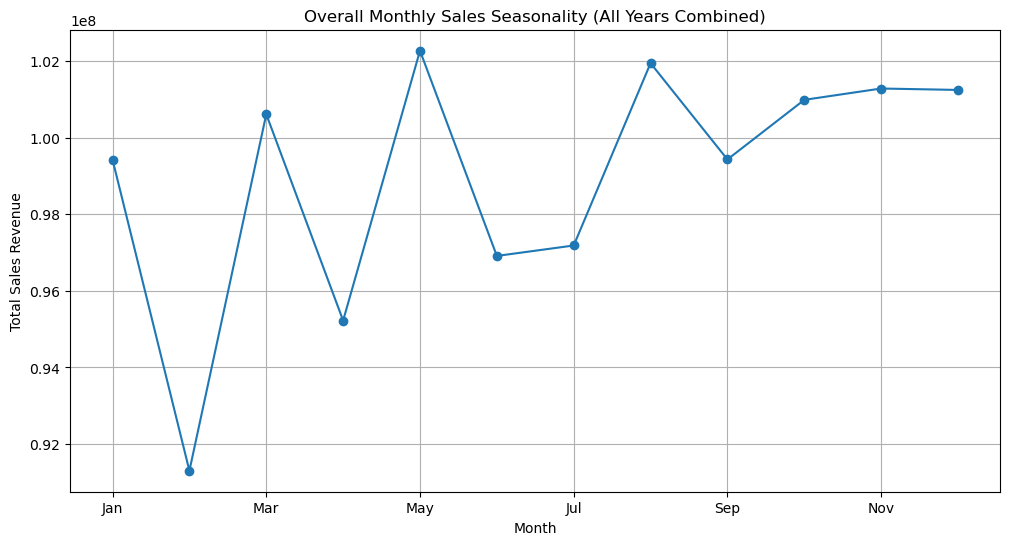

In [48]:
import matplotlib.pyplot as plt

# ensure order_date is datetime
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'])

# extract calendar month number
df_sales['month'] = df_sales['order_date'].dt.month

# aggregate revenue across all years by month
monthly_seasonality = (
    df_sales
    .groupby('month')['revenue']
    .sum()
)

monthly_seasonality.index = [
    'Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'
]

plt.figure(figsize=(12,6))
monthly_seasonality.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Overall Monthly Sales Seasonality (All Years Combined)')
plt.grid(True)
plt.show()



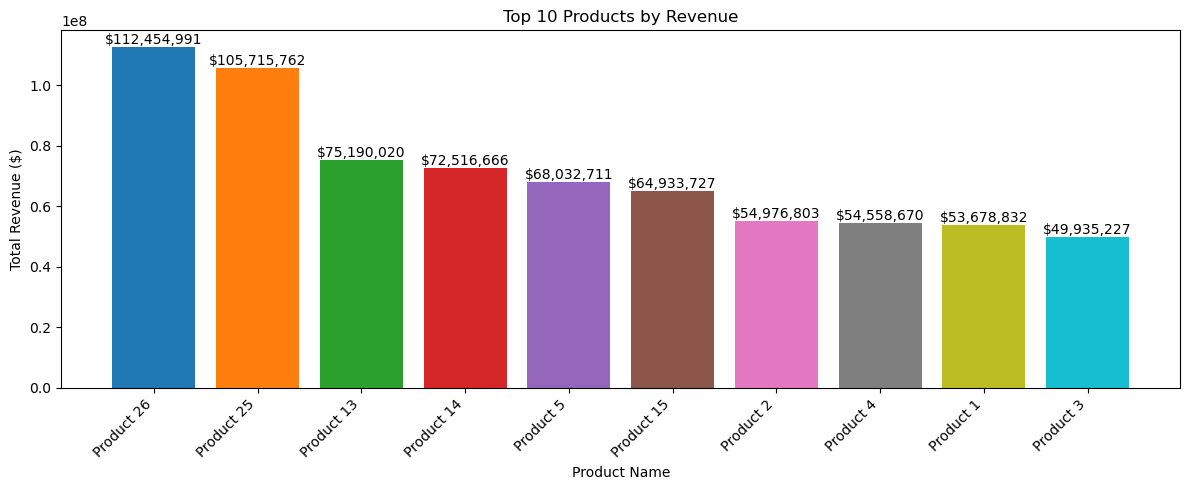

In [49]:


# aggregate revenue by product
top_10_products = (
    df_sales
    .groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# generate different colors
colors = plt.cm.tab10(range(len(top_10_products)))

# plot
plt.figure(figsize=(12,5))
bars = plt.bar(
    top_10_products.index,
    top_10_products.values,
    color=colors
)

# labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Revenue ($)')
plt.title('Top 10 Products by Revenue')
plt.xticks(rotation=45, ha='right')

# add dollar labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'${height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


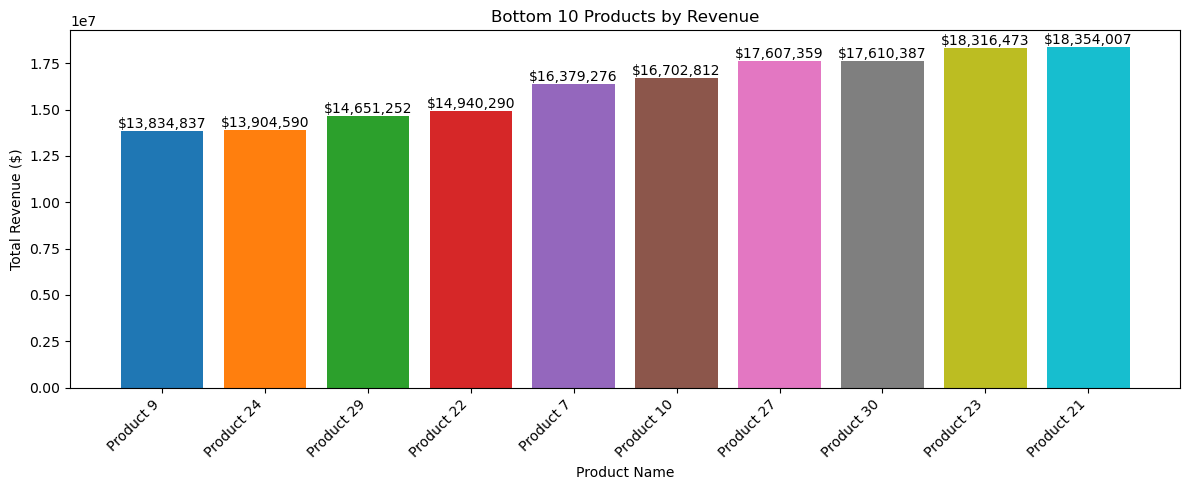

In [50]:
# aggregate revenue by product
bottom_10_products = (
    df_sales
    .groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

# generate different colors
colors = plt.cm.tab10(range(len(bottom_10_products)))

# plot
plt.figure(figsize=(12,5))
bars = plt.bar(
    bottom_10_products.index,
    bottom_10_products.values,
    color=colors
)

# labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Revenue ($)')
plt.title('Bottom 10 Products by Revenue')
plt.xticks(rotation=45, ha='right')

# add dollar labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'${height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


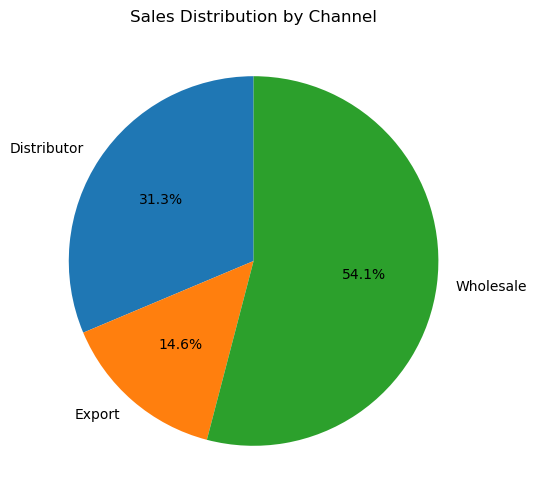

In [51]:

# aggregate revenue by channel
sales_by_channel = (
    df_sales
    .groupby('channel')['revenue']
    .sum()
)

# plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sales_by_channel.values,
    labels=sales_by_channel.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Sales Distribution by Channel')
plt.show()


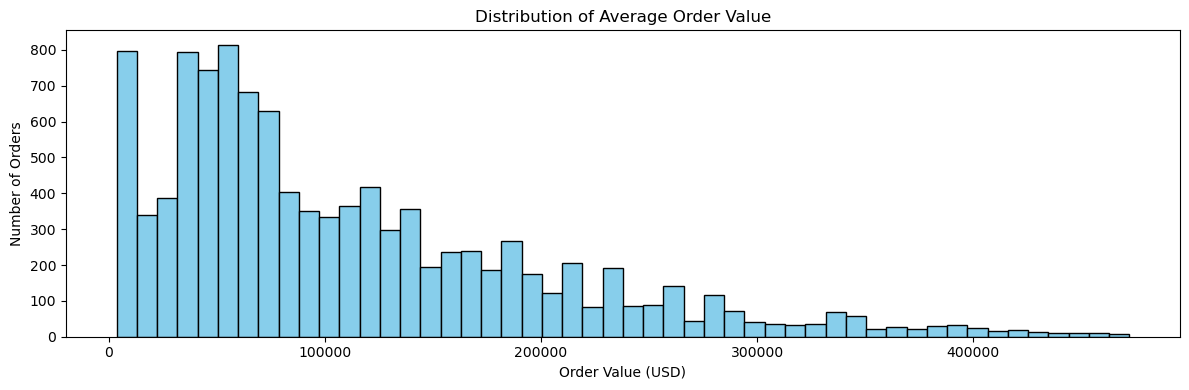

In [52]:
# Average Order Value (AOV) Distribution
aov = df_sales.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()


### INSIGHTS ---
The order‐value distribution is heavily right‐skewed, with most orders clustering between \$20 K and \$120 K and a pronounced mode around \$50 K–\$60 K.  

A long tail of high-value transactions extends up toward \$400 K–\$500 K, but these large orders represent only a small share of total volume. 

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_5132\941209901.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


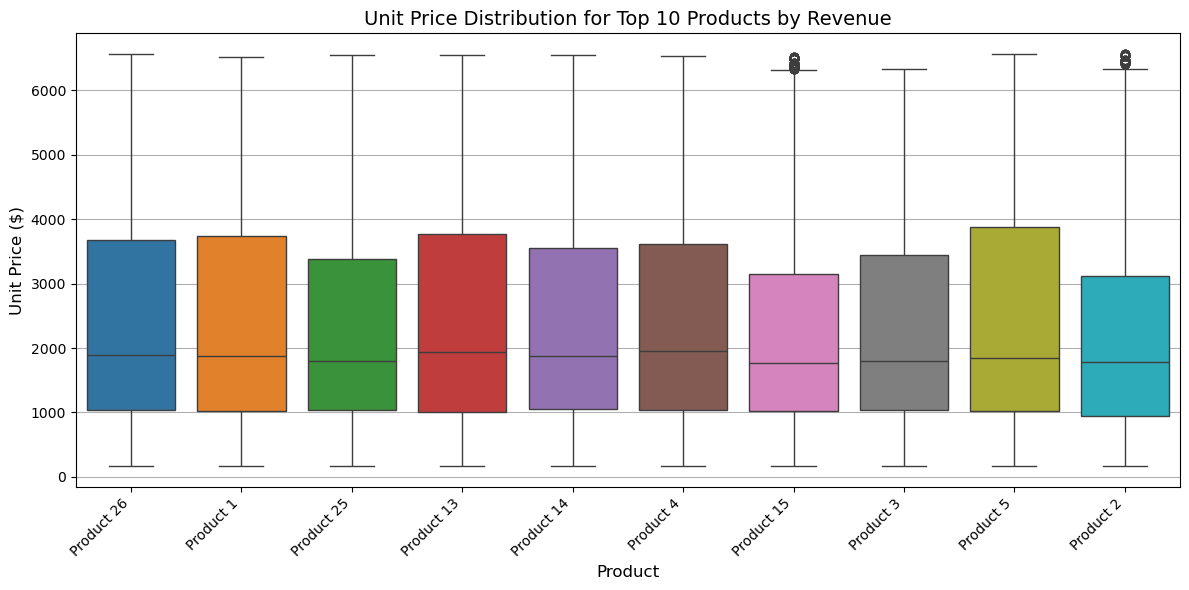

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# product revenue
product_revenue = (
    df_sales
    .groupby('product_name')['revenue']
    .sum()
    .reset_index()
)

# top 10 products by revenue
top_10_products = (
    product_revenue
    .sort_values('revenue', ascending=False)
    .head(10)['product_name']
    .tolist()
)

# filter top 10 products
df_top_10 = df_sales[df_sales['product_name'].isin(top_10_products)]

# create boxplot
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_top_10,
    x='product_name',
    y='unit_price',
    palette='tab10'
)

plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


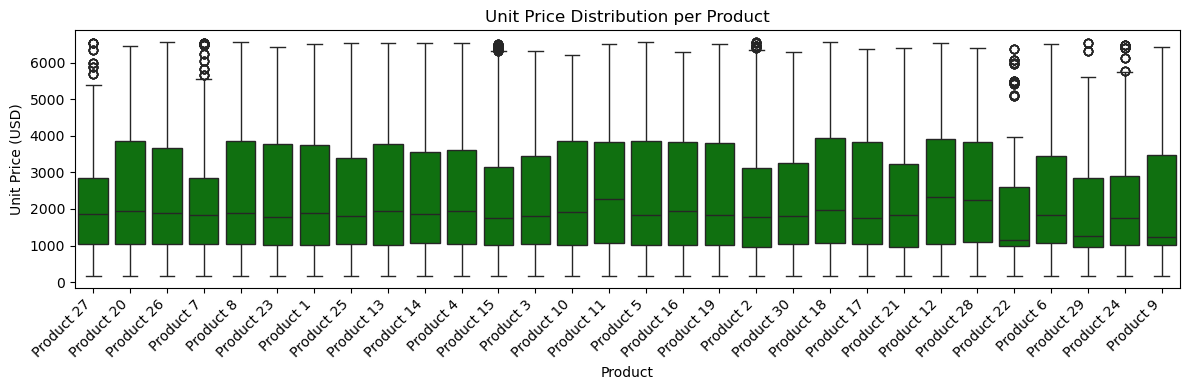

In [54]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df_sales,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

### INSIGHTS ---
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.  

In contrast, deep low-end outliers (near \$0–\$100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.  

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.  

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

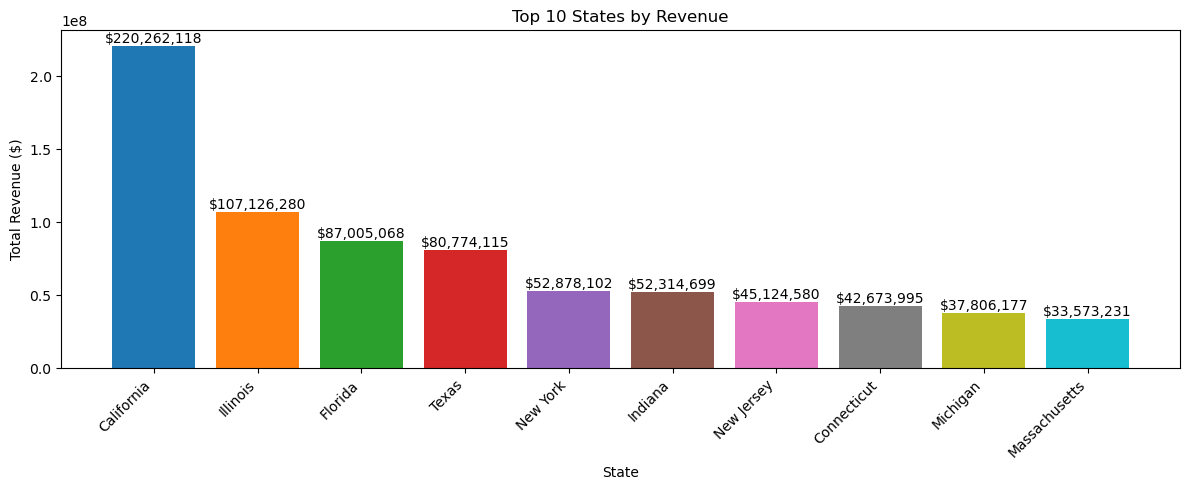

In [55]:
# top 10 states by revenue 

# aggregate revenue by state
state_revenue = (
    df_sales
    .groupby('state_name')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,5))

bars = plt.bar(
    state_revenue.index,
    state_revenue.values,
    color=plt.cm.tab10(range(len(state_revenue)))  # different colors
)

plt.xlabel('State')
plt.ylabel('Total Revenue ($)')
plt.title('Top 10 States by Revenue')
plt.xticks(rotation=45, ha='right')

# value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'${height:,.0f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


### INSIGHTS —  
- **California leads** with \$230 M, followed by Illinois (\$112 M) and Florida (\$90 M), forming a dominant top‑tier (> \$90 M).  
- **Mid‑tier states** (e.g., Texas \$85 M, New York \$55 M) hold steady performance but trail the top three by 40–145 M.  
- **Lower‑tier states** (e.g., New Jersey \$47 M down to Massachusetts \$35 M) reveal a gradual drop, indicating uneven market penetration.  
- **Action:** Double down on top states with tailored promotions, and launch targeted growth initiatives in under‑penetrated regions to close the gap.  

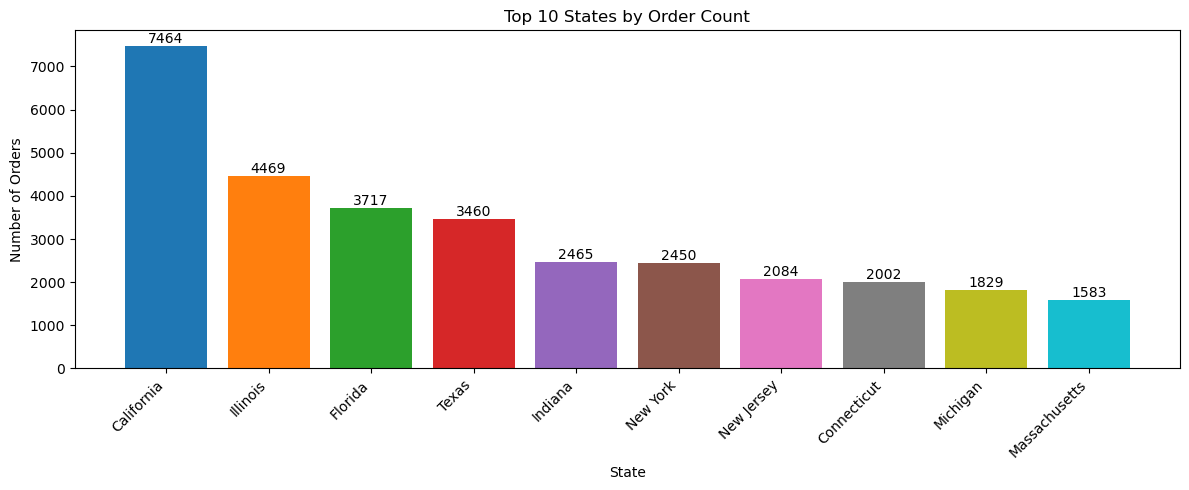

In [56]:
# top 10 states by order count

# aggregate order count by state
state_orders = (
    df_sales
    .groupby('state_name')['order_number']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,5))

bars = plt.bar(
    state_orders.index,
    state_orders.values,
    color=plt.cm.tab10(range(len(state_orders)))  # different colors
)

plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Top 10 States by Order Count')
plt.xticks(rotation=45, ha='right')

# value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


C:\Users\Sarthak\AppData\Local\Temp\ipykernel_5132\3530959722.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


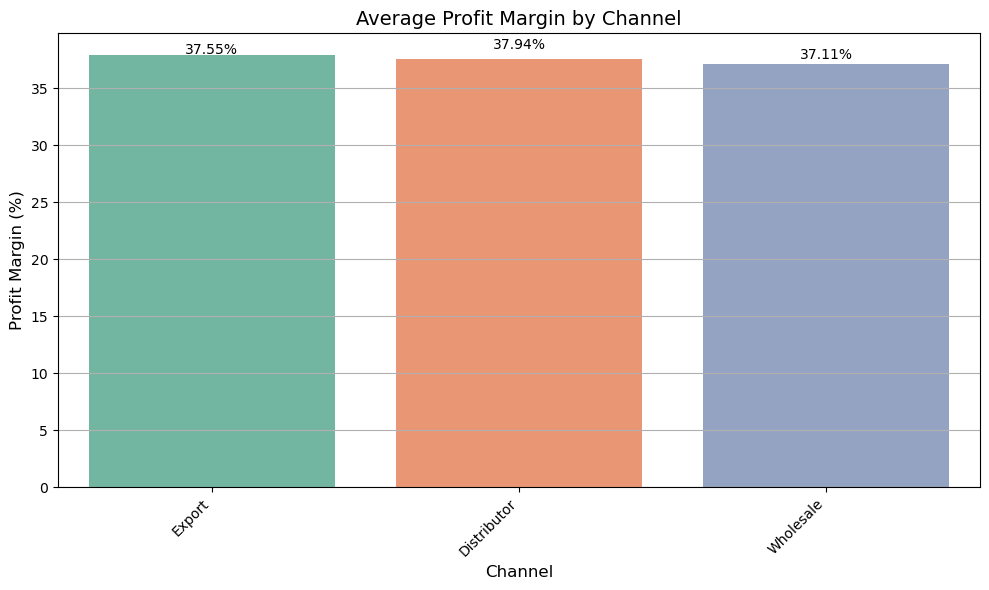

In [57]:
# avg profit margin by channel


# avg profit margin by channel
avg_profit_margin = (
    df_sales
    .groupby('channel')['profit_margin_pct']
    .mean()
    .reset_index()
)

# sort by profit margin descending
avg_profit_margin = avg_profit_margin.sort_values('profit_margin_pct', ascending=False)

# create barplot
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_profit_margin,
    x='channel',
    y='profit_margin_pct',
    palette='Set2'
)

plt.title('Average Profit Margin by Channel', fontsize=14)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# add values on bars
for index, row in avg_profit_margin.iterrows():
    plt.text(
        index, row.profit_margin_pct + 0.5, f"{row.profit_margin_pct:.2f}%", 
        ha='center', fontsize=10
    )

plt.tight_layout()
plt.show()


### INSIGHTS ---
Distributor leads with a 37.94 % average margin, closely followed by Export (37.55 %) and Wholesale (37.11 %).  

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.  

This uniformity implies well-controlled costs and pricing power everywhere.  

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.  

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_5132\3887598116.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


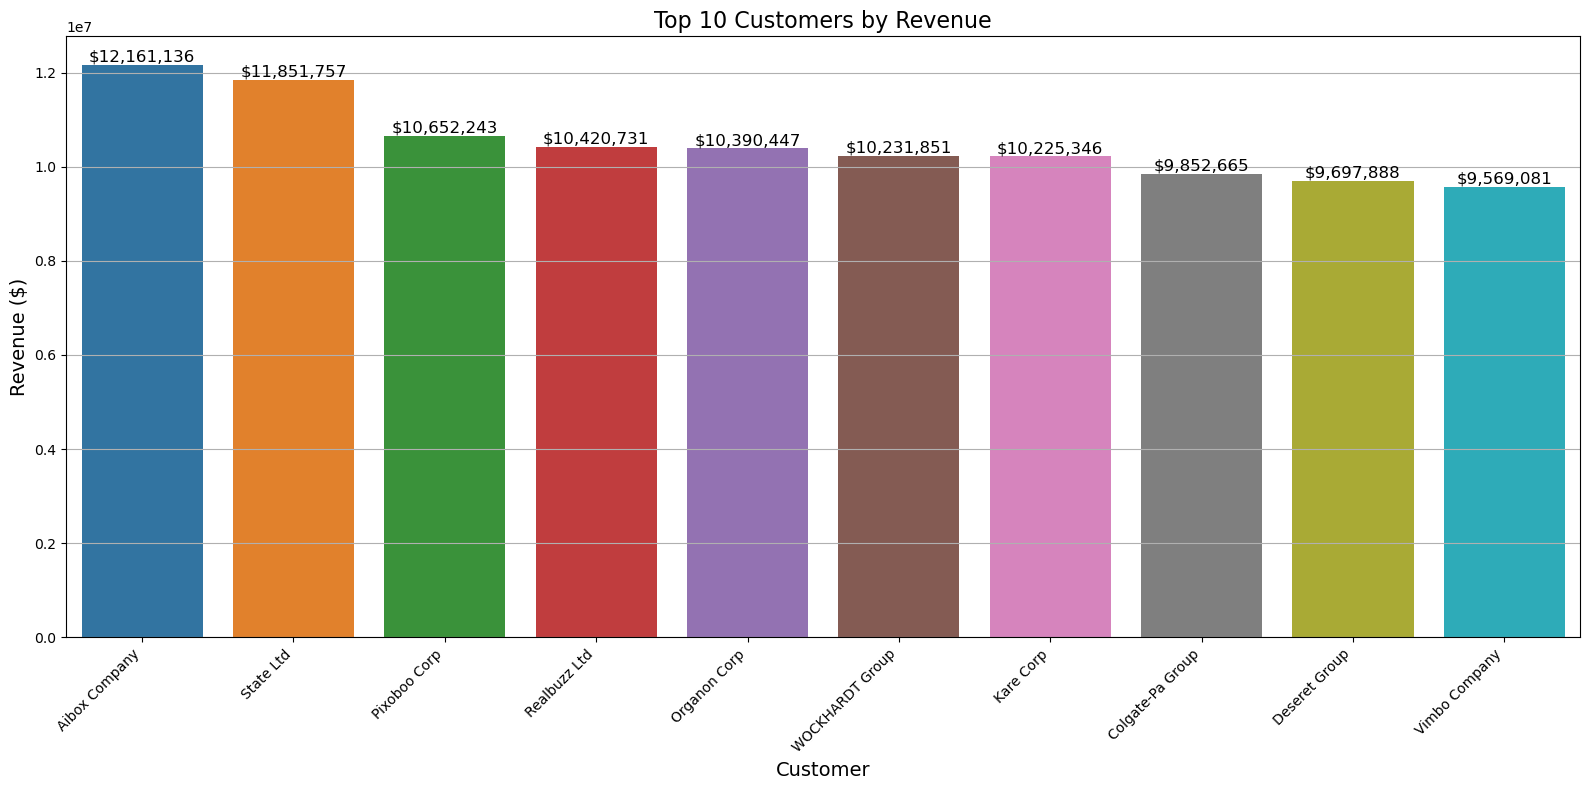

In [58]:

# top 10 customers by revenue
top_10_customers = (
    df_sales
    .groupby('customer_name')['revenue']
    .sum()
    .reset_index()
    .sort_values('revenue', ascending=False)
    .head(10)
)

# create barplot
plt.figure(figsize=(16,8))
barplot = sns.barplot(
    data=top_10_customers,
    x='customer_name',
    y='revenue',
    palette='tab10'
)

plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Customer', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# add labels on top of each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f"${height:,.0f}",                # text
        (p.get_x() + p.get_width() / 2, height),  # x, y position
        ha='center', va='bottom',         # center align, place above bar
        fontsize=12
    )

plt.tight_layout()
plt.show()


C:\Users\Sarthak\AppData\Local\Temp\ipykernel_5132\982785033.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


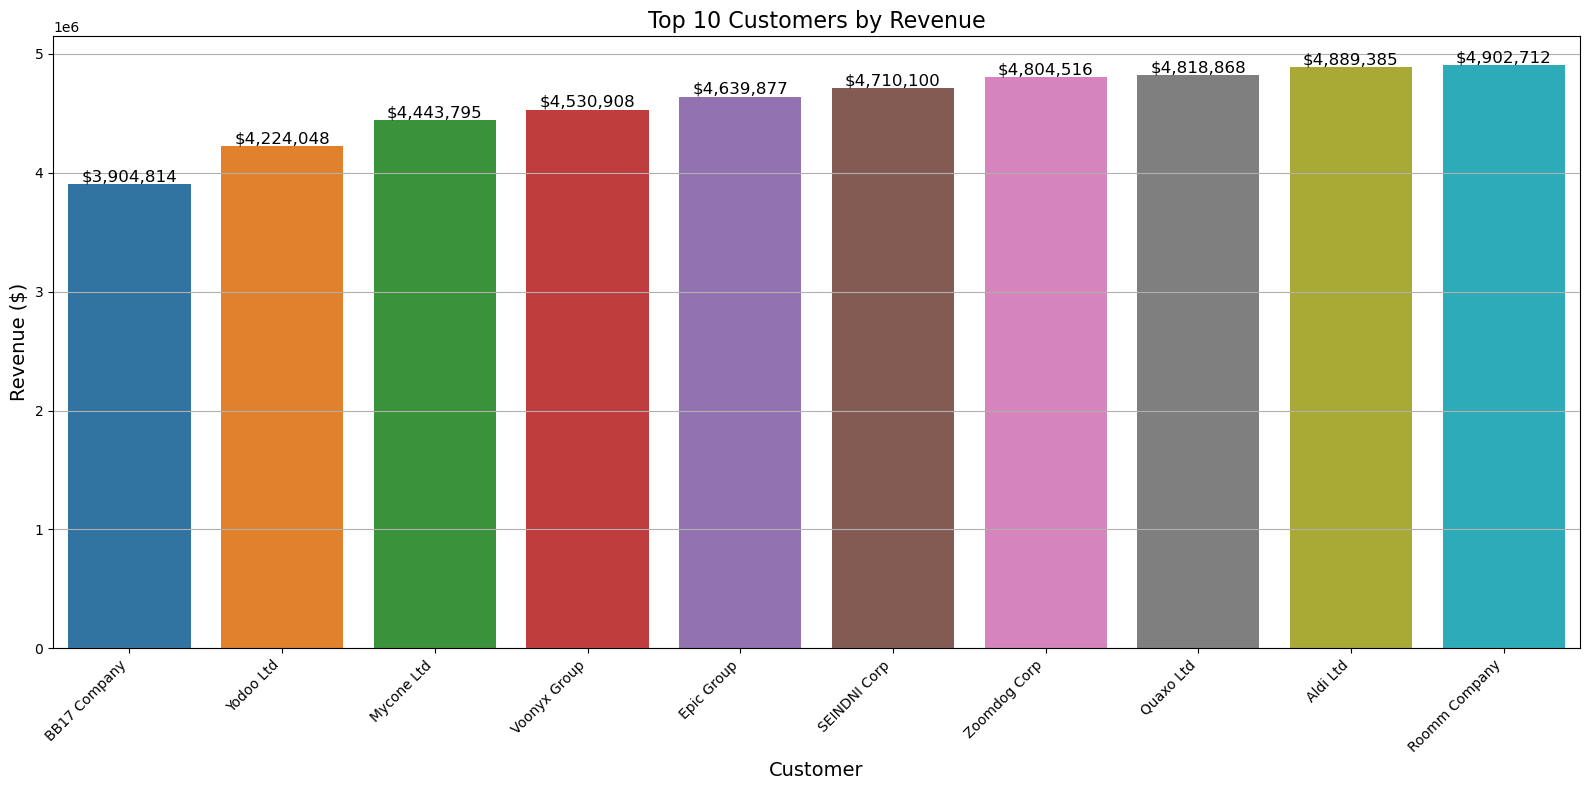

In [59]:

# bottom 10 customers by revenue

top_10_customers = (
    df_sales
    .groupby('customer_name')['revenue']
    .sum()
    .reset_index()
    .sort_values('revenue', ascending=True)
    .head(10)
)

# create barplot
plt.figure(figsize=(16,8))
barplot = sns.barplot(
    data=top_10_customers,
    x='customer_name',
    y='revenue',
    palette='tab10'
)

plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Customer', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# add labels on top of each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f"${height:,.0f}",                # text
        (p.get_x() + p.get_width() / 2, height),  # x, y position
        ha='center', va='bottom',         # center align, place above bar
        fontsize=12
    )

plt.tight_layout()
plt.show()


### INSIGHTS ---
- Aibox Company tops the list with \$12.5 M, followed closely by State Ltd (\$12.2 M), while the 10th-ranked Deseret Group still contributes \$9.9 M—demonstrating a tight \$10–12 M top tier.

- At the bottom, Johnson Ltd leads its group with \$5.1 M, down to BB17 Company at \$4.1 M—roughly half the top customer’s revenue.

- This steep drop from ~\$10 M+ to \$4–5 M highlights high revenue concentration among the top customers.

- Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.


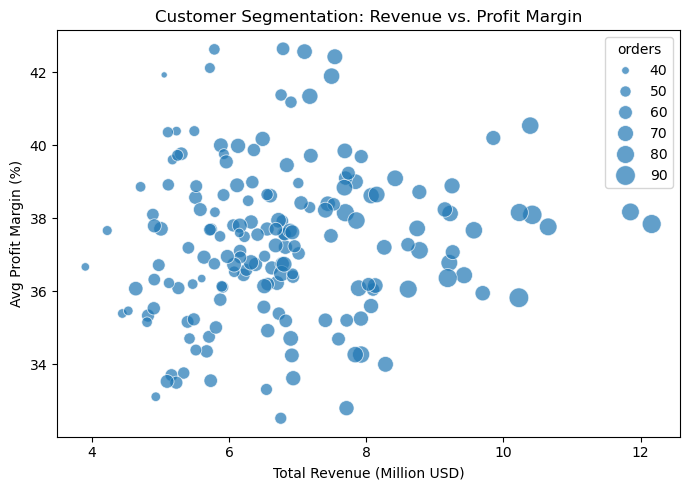

In [60]:
# customer segmentation: revenue vs profit margin

# Aggregate metrics per customer
cust_summary = df_sales.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()



### INSIGHTS ---

- Customers with >\$10 M in revenue tend to sustain margins between 36–40%, indicating that scale does not significantly erode profitability.
- Most customers cluster within the \$6–10 M range and show stable margins (~34–40%), suggesting consistent pricing in this tier.
- Customers below \$6 M display the widest margin variance (~33–43%), pointing to more volatile cost structures or discounts among smaller accounts.
- Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.


In [61]:
df_sales.columns

Index(['order_number', 'order_date', 'customer_name', 'channel',
       'product_name', 'quantity', 'unit_price', 'revenue', 'total_unit_cost',
       'state', 'county', 'state_name', 'us_region', 'lat', 'lon', 'budget',
       'total_cost', 'profit', 'profit_margin_pct', 'order_month', 'month'],
      dtype='object')

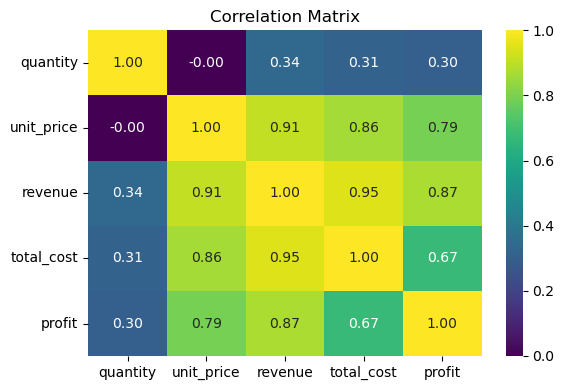

In [62]:
# correlation heatmap

# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df_sales[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

# Insights

- **Profit and revenue** are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.  
- **Unit price** is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.86 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.  
- **Cost** shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.  
- **Quantity** has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.  

In [63]:
df_sales.to_excel('Sales_Analysis_after_eda.xlsx',index=False)